In [1]:
#Pandas for managing datasets 
import pandas as pd 

In [2]:
#Matplotlib for additional customization 
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Seaborn for plotting and styling 
import seaborn as sns 

Note: The argument  index_col=0 simply means we'll treat the first column of the dataset as the ID column

In [4]:
#Read dataset 
df = pd.read_csv('Pokemon.csv', index_col = 0)

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Seaborn's plotting functions 

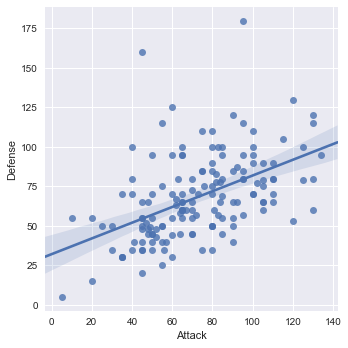

In [6]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)

# Alternative way 
# sns.lmplot(x=df.Attack, y=df.Defense)

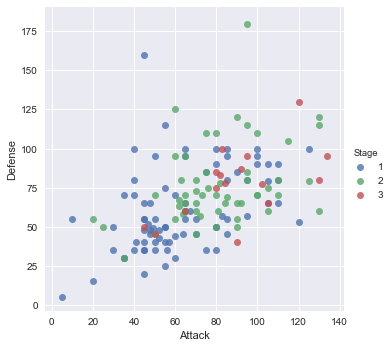

In [7]:
#Scatterplot arguments 
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg = False, #No regression line 
           hue ='Stage') # Color by evolution stage 

# Customizing with Matplotlib

(0, 142.25647612435475)

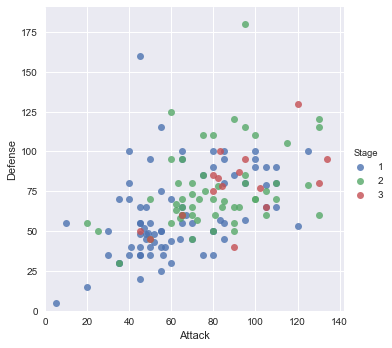

In [8]:
#Plot using Seaborn 
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg = False, 
           hue ='Stage')

#Tweak using Matplotlib 
plt.ylim(0, None) # Giving axes limits 
plt.xlim(0, None)

# The role of Pandas

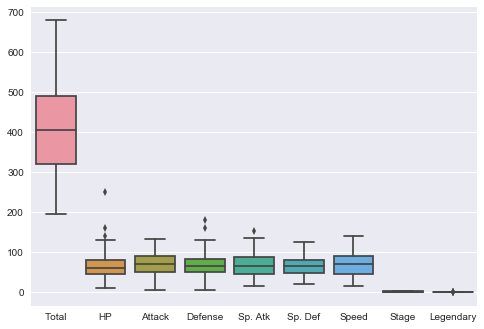

In [9]:
# Boxplot 
sns.boxplot(data=df)

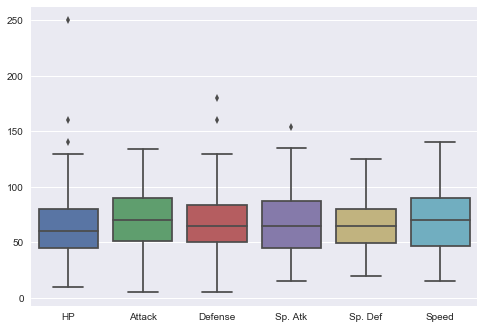

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)

# New boxplot using stats_df
sns.boxplot(data=stats_df)

# Seaborn Themes

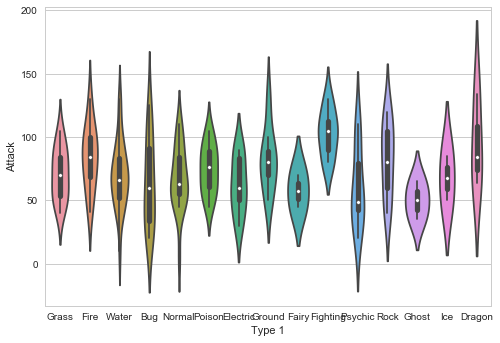

In [11]:
# Set theme 
sns.set_style('whitegrid')

# Violin plot: They show the distribution (through the thickness of the violin) instead of only the summary statistics
sns.violinplot(x='Type 1', y='Attack', data=df)

# Color palettes

In [12]:
# Use Bulbapedia to create a new color palette 
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

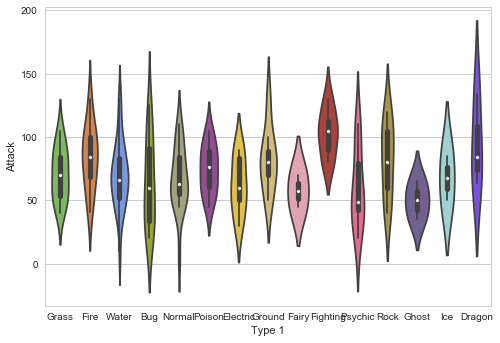

In [13]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, palette = pkmn_type_colors) #Set color palette

# Swarm plot: 

This visualization will show each point, while "stacking" those with similar values

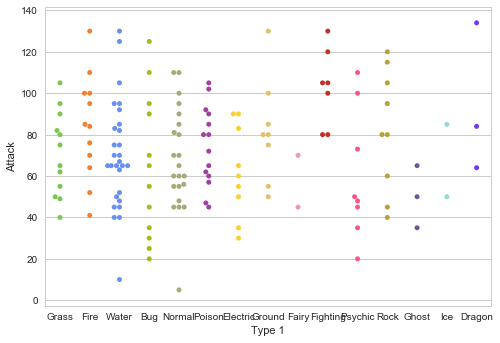

In [14]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y ='Attack', data=df, palette=pkmn_type_colors)

# Overlaying swarm and violin plots


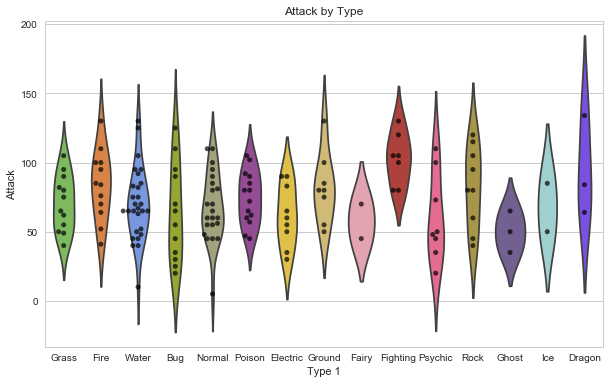

In [15]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

# Putting it all together 

In [16]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [20]:
# Melt DataFrame 
melted_df = pd.melt(stats_df,
                    id_vars = ['Name', 'Type 1', 'Type 2'], #Variables to keep
                    var_name = 'Stat') # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [21]:
# Shape comparison 
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


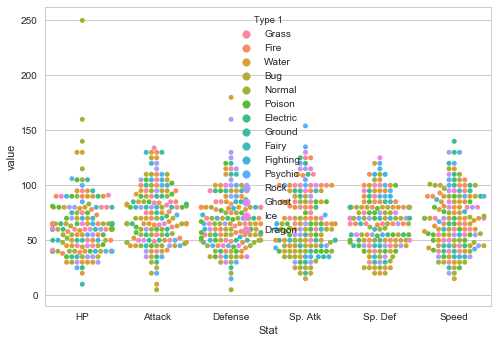

In [22]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

# Customisation 

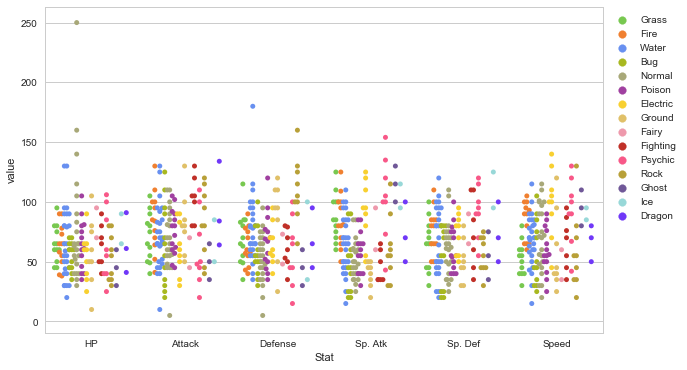

In [23]:
# 1. Enlarge the plot 
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',
              y='value',
              data=melted_df,
              hue = 'Type 1',
              split = True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette

# 4. Place legend to the right 
plt.legend(bbox_to_anchor=(1,1), loc=2)

# Heatmap 

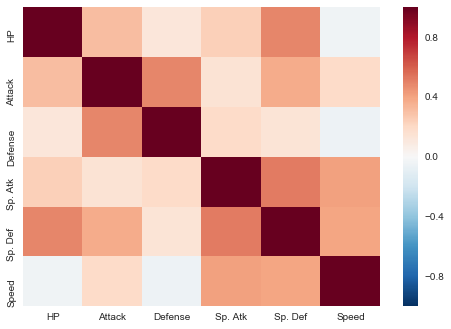

In [24]:
# Calcualte correlations 
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

# Histogram 

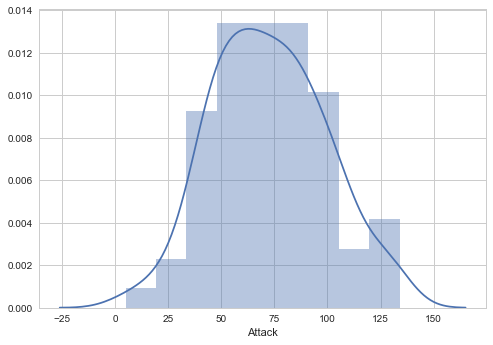

In [27]:
# Distribution Plot
sns.distplot(df.Attack)

# Bar Plot

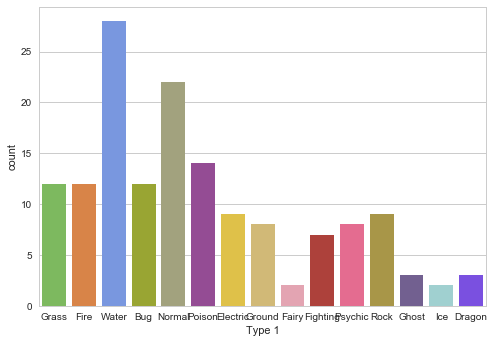

In [29]:
# Count Plot 
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

# Rotate x-labels 
#plt.xticks(rotations=-45)

# Factor Plot 

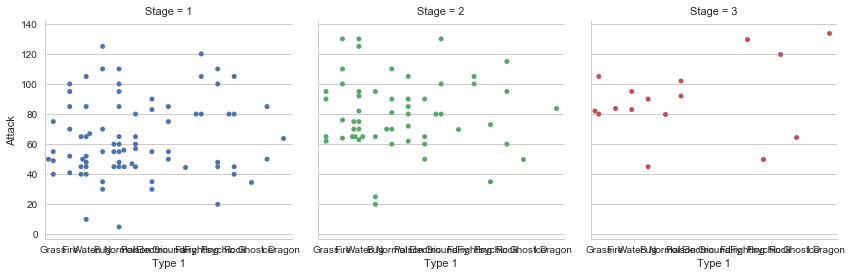

In [30]:
# Factor Plot - make it easy to separate plots by categorical classes
g = sns.factorplot(x= 'Type 1',
                   y= 'Attack',
                   data = df,
                   hue = 'Stage', # Color by stage
                   col = 'Stage', # Separate by stage
                   kind = 'swarm') # Swarmplot


# Density Plot

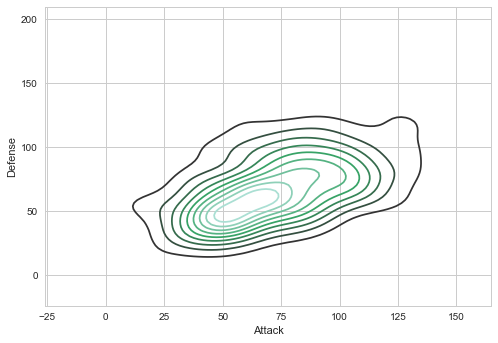

In [31]:
# Densit Plot - display the distribution between two variables 
sns.kdeplot(df.Attack, df.Defense)

# Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions

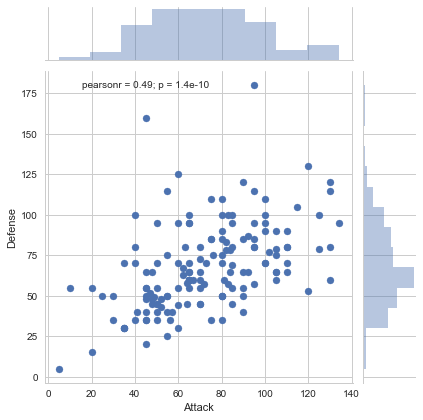

In [32]:
# Joint Distribution Plot 
sns.jointplot(x='Attack', y='Defense', data=df)